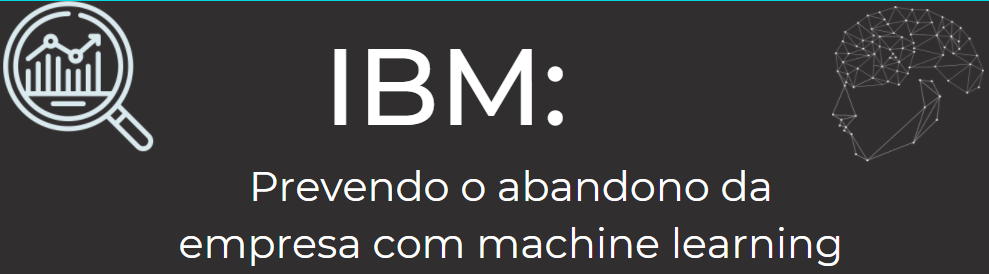

##### Importando Bibliotecas

In [544]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
from sklearn.model_selection import train_test_split
import researchpy as rp
import scipy.stats as stats
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.neural_network import MLPClassifier


## Vamos responder às seguintes solicitações/perguntas do departamento de RH da IBM:

##### 1) Panorama geral envolvendo a descrição e associação das variáveis da empresa. 
##### 2) Quantos funcionários deixaram a empresa? Quantos ficaram na empresa?
##### 3) Nesta empresa é possível dizer se a idade é um fator significativo para sair da empresa?
##### 4) Nesta empresa existe uma diferença salarial dos funcionários de acordo com estado civil?
##### 5) Existe uma diferença salarial entre as diferentes áreas da empresa?
##### 6) Nesta empresa existe uma diferença salarial dos funcionários de acordo com o sexo? Ou seja, é possível afirmar que homens e mulheres possuem diferenças significativas de     salário?
##### 7) É possível afirmar que homens tendem a sair mais da empresa do que mulheres?
##### 8) Construa um algoritmo de machine learning capaz de prever a ausência dos funcionários da empresa.



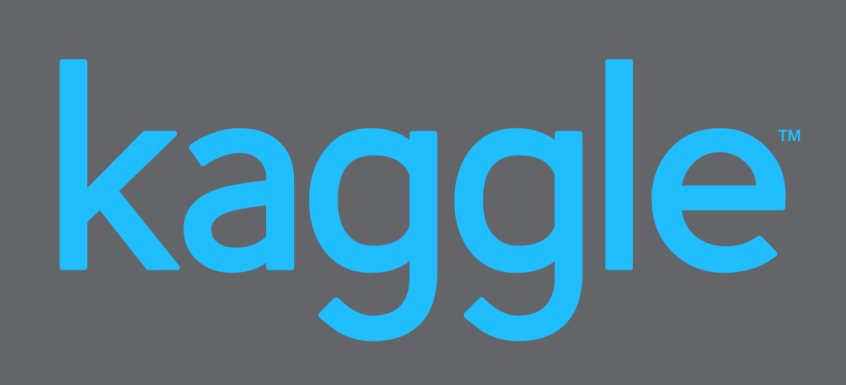
#### Link de onde os dados foram retirados
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [545]:
dfibm = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")#Abrindo banco de dados

### Dicionário dos dados
* Education

1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

* EnvironmentSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* JobInvolvement

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* JobSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* PerformanceRating

1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

* RelationshipSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* WorkLifeBalance

1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [546]:
dfibm.shape #observando tamanho do Dataframe

(1470, 35)

#### Avaliação geral do banco de dados/Exploração da variável.  
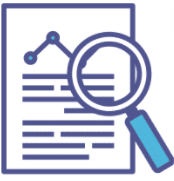


In [547]:
dfibm.head()#primeira olhada nos dados

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [548]:
dfibm.info()# como  é possível observar, não temos nenhum valor missing em nenhuma das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<AxesSubplot:>

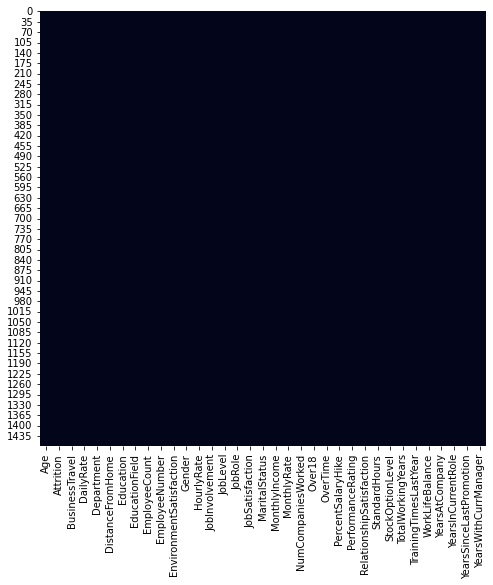

In [549]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(dfibm.isnull(),cbar=False, ax = ax)
#Mostrando graficamente a inexistência de missings

In [550]:
dfibm.describe()#descrição geral das variáveis

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [551]:
dfibm['Attrition'] = dfibm['Attrition'].apply(lambda x:1 if x== 'Yes' else 0)

In [552]:
dfibm['OverTime'] = dfibm['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
dfibm['Over18'] = dfibm['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [553]:
dfibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [554]:
dfibm.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'],inplace=True) #retirando colunas descecessárias

## Resposta: 1) Panorama geral envolvendo a descrição e associação das variáveis da empresa. 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'Stoc

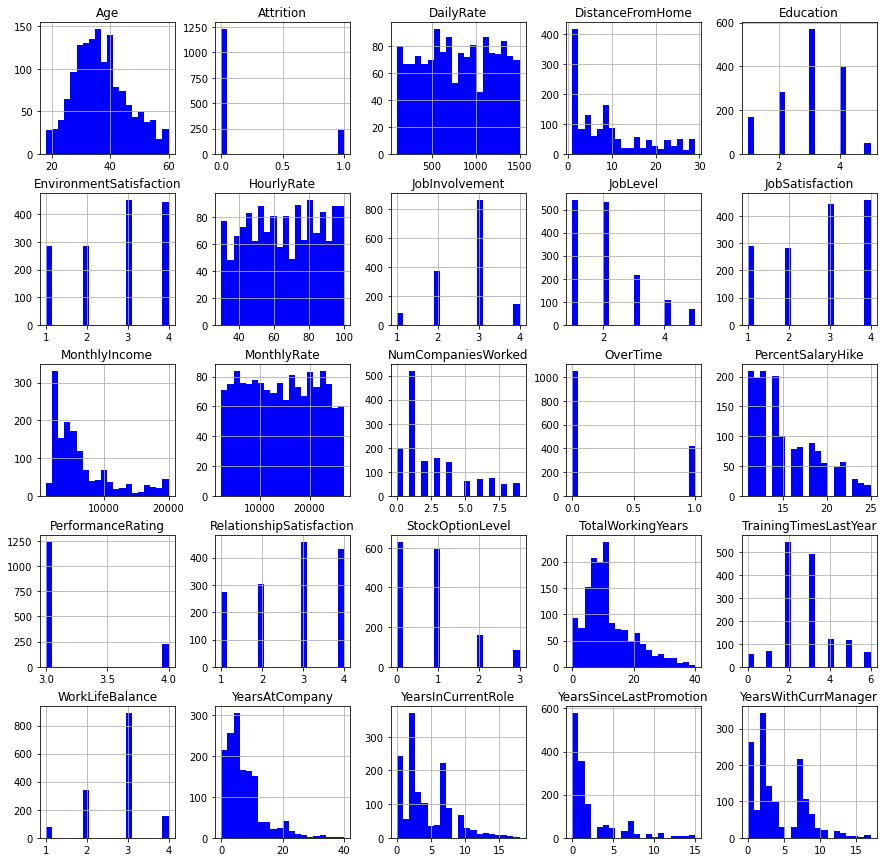

In [555]:
dfibm.hist(bins = 20, figsize=(15,15), color = 'b')

##### Através deste heatmap é possível identificar como cada uma das variáveis no banco se correlacionam.Quanto mais claro, mais as variáveis se associam positivimanete, sendo 1 uma associação perfeita(positiva). Em contrapartida, quanto mais escuro, menor a associação.


<AxesSubplot:>

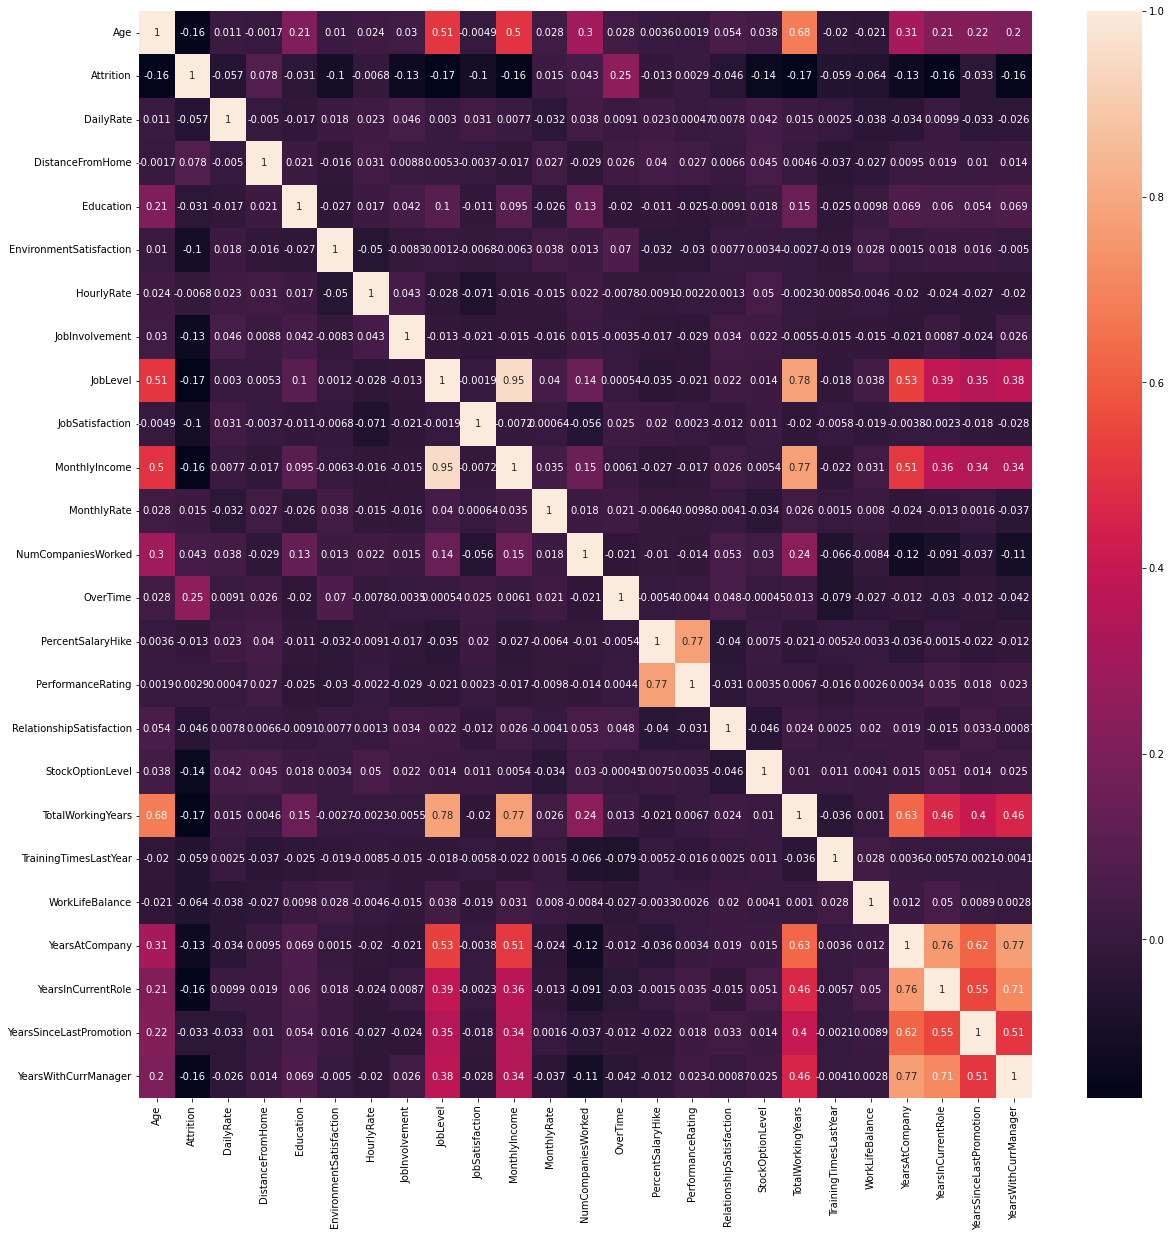

In [556]:

plt.figure(figsize=(20,20))
sns.heatmap(dfibm.corr(),annot=True)


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

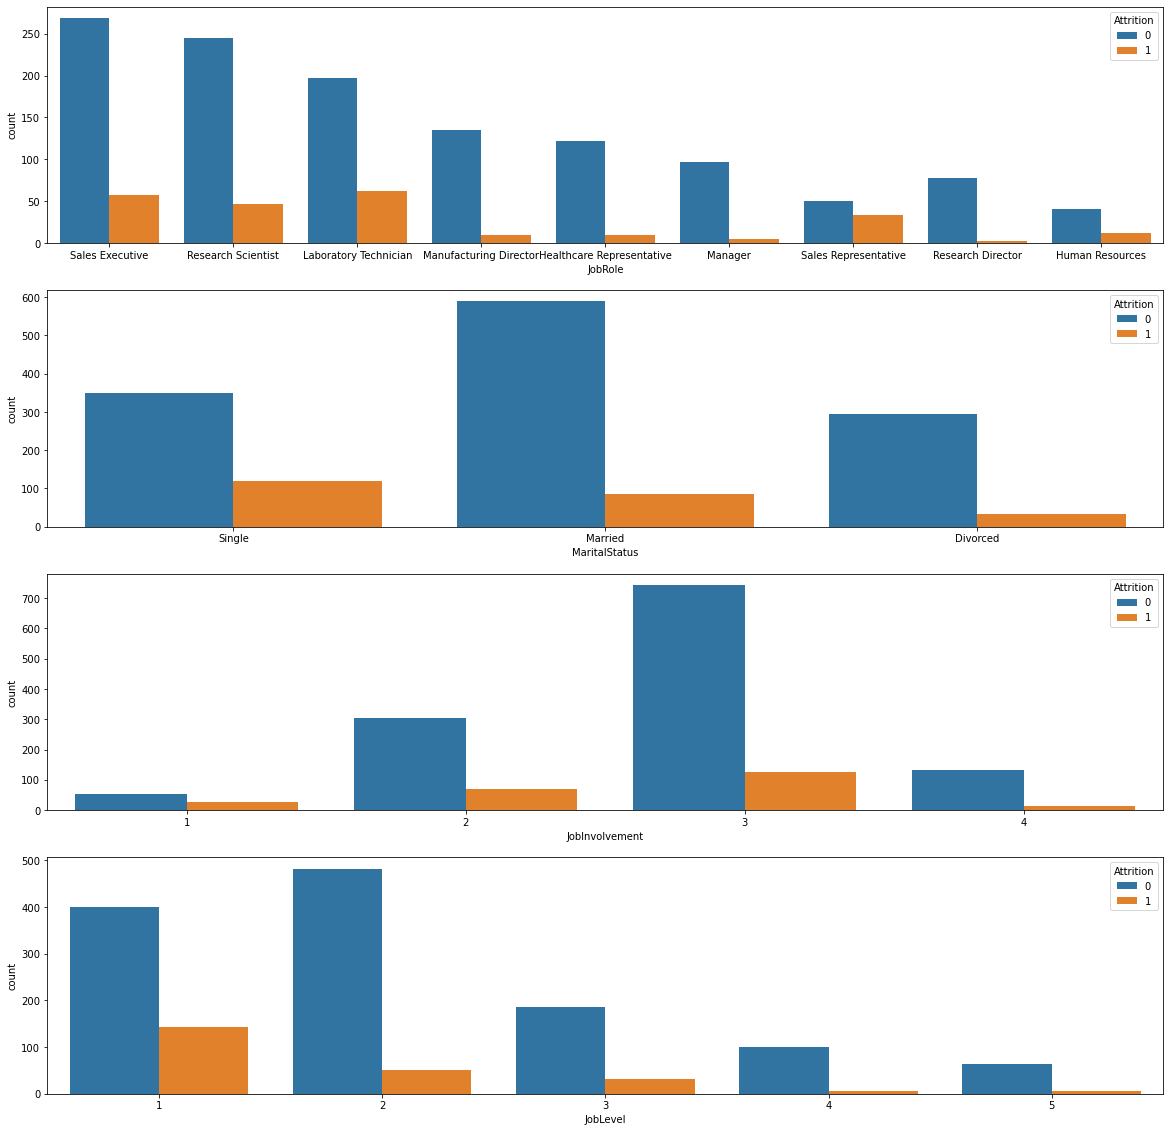

In [557]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = dfibm)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = dfibm)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = dfibm)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = dfibm)

## Resposta: 2)Quantos funcionários deixaram a empresa? Quantos ficaram na empresa?


In [558]:
deixaram_empresa = dfibm[dfibm['Attrition']==1]
numero_left = len(deixaram_empresa)
porcentagem_deixaram = numero_left/len(dfibm)*100
print ('O numero de pessoas que deixaram a empresa foi de:', numero_left, 'pessoas.')
print('Um percentual de', round(porcentagem_deixaram,2), '% do total de pessoas da empresa.')

O numero de pessoas que deixaram a empresa foi de: 237 pessoas.
Um percentual de 16.12 % do total de pessoas da empresa.


In [559]:
ficaram_empresa = dfibm[dfibm['Attrition']==0]
numero_stay = len(ficaram_empresa)
porcentagem_ficaram = numero_stay/len(dfibm)*100
print ('O numero de pessoas que ficaram a empresa foi de:', numero_stay,'pessoas.')
print('Um percentual de', round(porcentagem_ficaram,2), '% do total de pessoas da empresa.')


O numero de pessoas que ficaram a empresa foi de: 1233 pessoas.
Um percentual de 83.88 % do total de pessoas da empresa.


In [560]:
#Comparando o salário das pessoas que saem e que ficaram na empresa
deixaram_empresa.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [561]:
ficaram_empresa.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


## Resposta: 3) Nesta empresa é possível dizer se a idade é um fator significativo para sair da empresa?


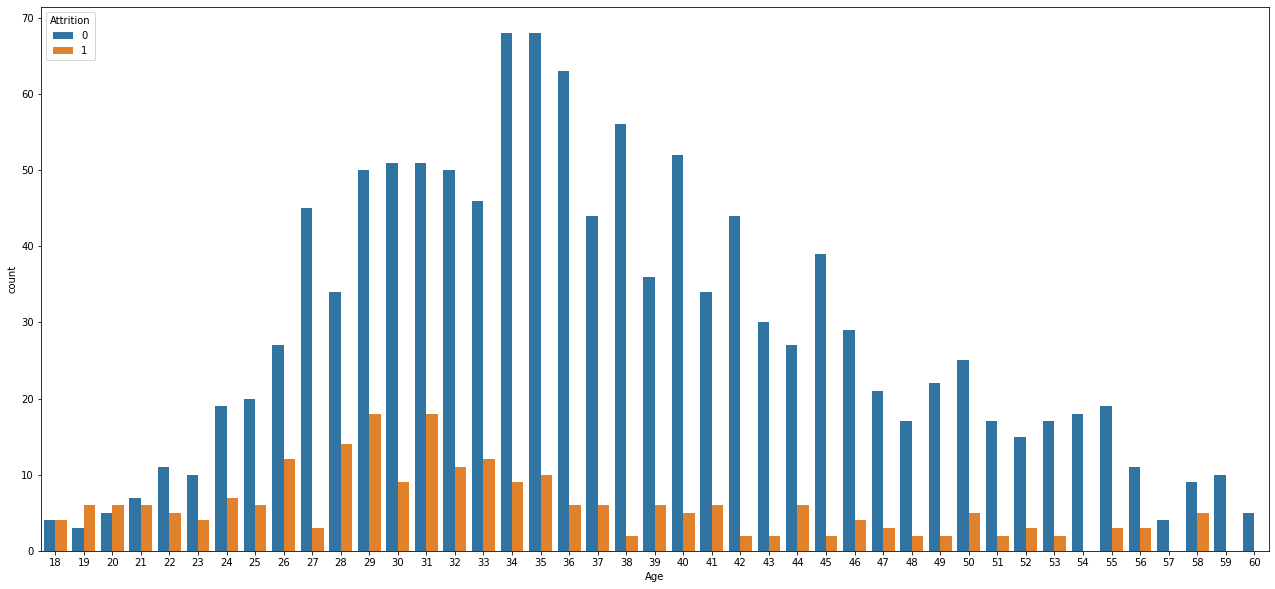

In [562]:
plt.figure(figsize=[22,10])
sns.countplot(x = 'Age', hue = 'Attrition', data=dfibm);

In [563]:
model_3 = ols('Age~Attrition',
            data = dfibm).fit()
anova_result = sm.stats.anova_lm(model_3, type =2)
print(round(anova_result,4))


               df       sum_sq    mean_sq        F  PR(>F)
Attrition     1.0    3107.3334  3107.3334  38.1759     0.0
Residual   1468.0  119488.1333    81.3952      NaN     NaN


##### Através do teste Anova é possível ver que há diferença significativa entre as idades quando avaliamos o risco de sair da empresa. 
##### Pelo gráfico, conseguimos ver que pessoas mais novas possuem mais chances de sair da empresa do que pessoas mais velhas na empresa.

## Resposta: 4) Nesta empresa existe uma diferença salarial dos funcionários de acordo com estado civil?



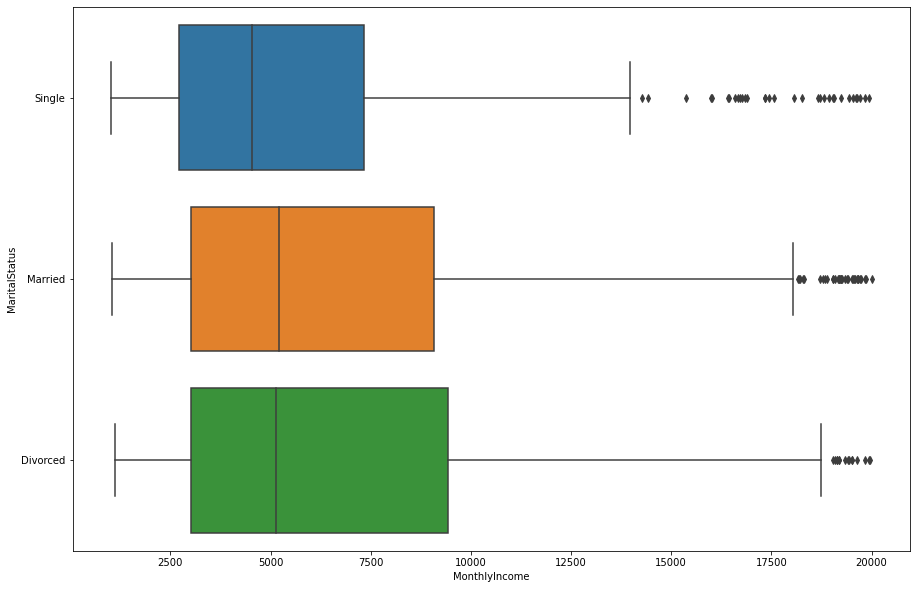

In [564]:
#comparando renda por Estado civil
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'MaritalStatus', data=dfibm);

In [565]:
#Anova tem por intuito comparar se a diferença salarial entre os grupos foi ou não significativa

model = ols('MonthlyIncome~MaritalStatus',
            data = dfibm).fit()
anova_result = sm.stats.anova_lm(model, type =2)
print(round(anova_result,3))

                   df        sum_sq       mean_sq      F  PR(>F)
MaritalStatus     2.0  2.600197e+08  1.300098e+08  5.905   0.003
Residual       1467.0  3.230016e+10  2.201783e+07    NaN     NaN


##### Através do teste Anova é possível ver que há diferença significativa entre o estado civil e os salários.

## Resposta: 5) Existe uma diferença salarial entre as diferentes áreas da empresa?


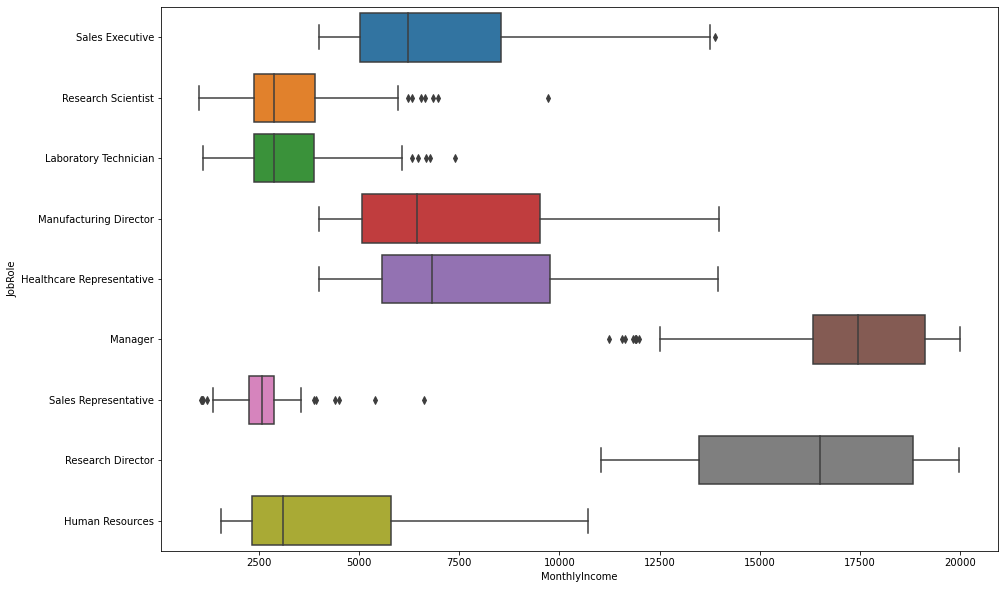

In [566]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=dfibm);

In [567]:
#Medida anova avaliando o ganho diário de acordo com 

model_2 = ols('MonthlyIncome~JobRole',
            data = dfibm).fit()
anova_result = sm.stats.anova_lm(model_2, type =2)
print(round(anova_result,3))

              df        sum_sq       mean_sq        F  PR(>F)
JobRole      8.0  2.657098e+10  3.321373e+09  810.214     0.0
Residual  1461.0  5.989190e+09  4.099377e+06      NaN     NaN


## Resposta: 6) Nesta empresa existe uma diferença salarial dos funcionários de acordo com o sexo? Ou seja, é possível afirmar que homens e mulheres possuem diferenças significativas de salário?


In [568]:
dfibm['Gender']

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

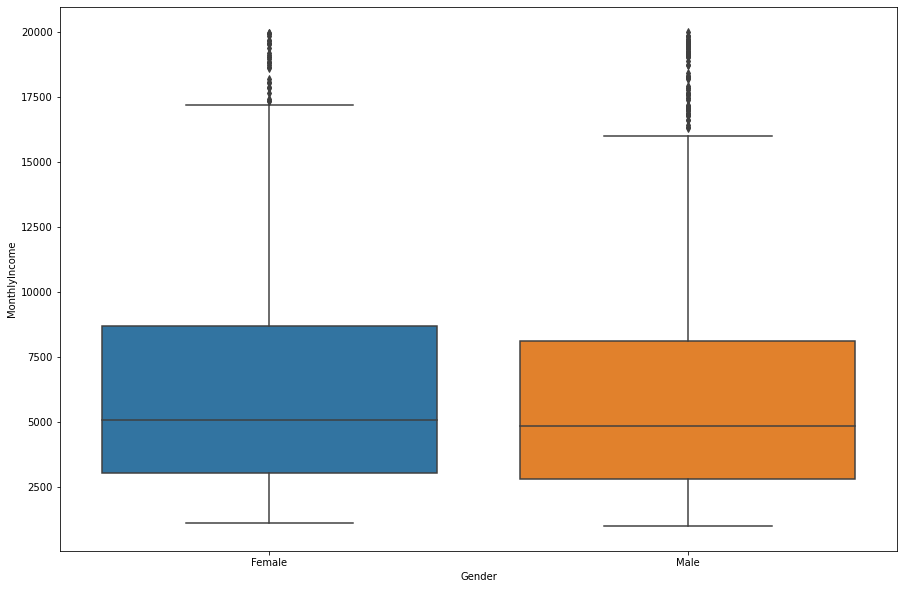

In [569]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Gender', y = 'MonthlyIncome', data=dfibm);

In [570]:
#Para comparar os dois grupos usamos o teste T de amostras independentes.

In [571]:
rp.ttest(group1= dfibm['MonthlyIncome'][dfibm['Gender'] == 'Male'], group1_name= "Male",
         group2= dfibm['MonthlyIncome'][dfibm['Gender'] == 'Female'], group2_name= "Female")

(   Variable       N         Mean           SD          SE    95% Conf.  \
 0      Male   882.0  6380.507937  4714.856577  158.757479  6068.920931   
 1    Female   588.0  6686.566327  4695.608507  193.643631  6306.247614   
 2  combined  1470.0  6502.931293  4707.956783  122.793054  6262.062872   
 
       Interval  
 0  6692.094942  
 1  7066.885039  
 2  6743.799713  ,
               Independent t-test    results
 0  Difference (Male - Female) =   -306.0584
 1          Degrees of freedom =   1468.0000
 2                           t =     -1.2213
 3       Two side test p value =      0.2222
 4      Difference < 0 p value =      0.1111
 5      Difference > 0 p value =      0.8889
 6                   Cohen's d =     -0.0650
 7                   Hedge's g =     -0.0650
 8               Glass's delta =     -0.0649
 9                 Pearson's r =      0.0319)

## Resposta: 7) É possível afirmar que homens tendem a sair mais da empresa do que mulheres?

In [572]:
#Aqui nós corrigimos a variável "Attrition" transformando a mesma em categórica para compará-la adequadamente com a variável "Gender".
Attrition = [0, 1]
dummy_vars=["não saiu da empresa","saiu da empresa"]
dfibm['Attrition'] = dfibm['Attrition'].replace(Attrition, dummy_vars)
dfibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,saiu da empresa,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,não saiu da empresa,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,saiu da empresa,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,não saiu da empresa,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,não saiu da empresa,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [573]:
#Tabela comparando a saída da emoresa pelo sexo.

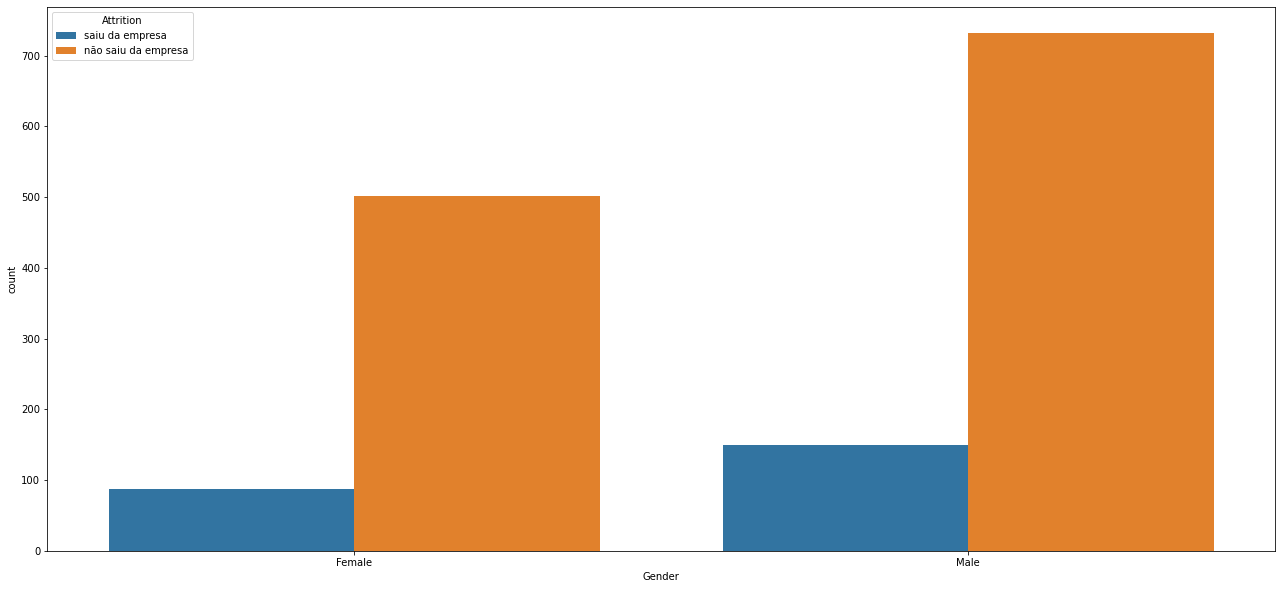

In [574]:
plt.figure(figsize=[22,10])
sns.countplot(x = 'Gender', hue = 'Attrition', data=dfibm);

In [575]:
dfibm["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [576]:
dfibm["Attrition"].value_counts()

não saiu da empresa    1233
saiu da empresa         237
Name: Attrition, dtype: int64

In [577]:
dfibm["Attrition"].value_counts()

não saiu da empresa    1233
saiu da empresa         237
Name: Attrition, dtype: int64

In [578]:
#Para comparar estes dois grupos, usaremos o teste χ2.

In [579]:
dfibm.groupby(["Attrition",'Gender']).size()

Attrition            Gender
não saiu da empresa  Female    501
                     Male      732
saiu da empresa      Female     87
                     Male      150
dtype: int64

In [580]:
sex_diferences = np.array([[732,150],[87,501]])#

In [581]:
suma = chi2_contingency(sex_diferences)
print(suma)

(662.255422295745, 4.828766661513985e-146, 1, array([[491.4, 390.6],
       [327.6, 260.4]]))


In [582]:
dfibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [583]:
Attrition = ["não saiu da empresa", "saiu da empresa"]
dummy_vars=[0,1]
dfibm['Attrition'] = dfibm['Attrition'].replace(Attrition, dummy_vars)
dfibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Resumo: Através dos dados desta empresa é possível avaliar que é a significativa a diferença entre homens e mulheres na saída da empresa, sendo os homens mais propensos a sair da mesma comparativamente às mulheres.

## 8) Construa um algoritmo de machine learning capaz de prever a ausência dos funcionários da empresa.

In [584]:
dfibm.info() #Observando o banco de dados geral novamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

#### Corrigindo a variável modificada

In [585]:
Attrition = ['"não saiu da empresa', 'saiu da empresa']
dummy_vars=[0,1]

dfibm['Attrition'] = dfibm['Attrition'].replace(Attrition, dummy_vars)
dfibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [586]:
cat_var = dfibm[['BusinessTravel','Department','EducationField', 'Gender', 'JobRole','MaritalStatus']]

In [587]:
# Colocando as variáveis categóricas como dummy através do OneHotEnconder

In [588]:
onehotenconder = OneHotEncoder()
cat_var = onehotenconder.fit_transform(cat_var).toarray()

In [589]:
cat_var = pd.DataFrame(cat_var)
cat_var

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [590]:
num_var = dfibm[['Age', 'DailyRate', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

In [591]:
num_var['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [592]:
scaler = MinMaxScaler()


In [593]:
banco = pd.concat([cat_var,num_var],axis = 1)
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         1470 non-null   float64
 1   1                         1470 non-null   float64
 2   2                         1470 non-null   float64
 3   3                         1470 non-null   float64
 4   4                         1470 non-null   float64
 5   5                         1470 non-null   float64
 6   6                         1470 non-null   float64
 7   7                         1470 non-null   float64
 8   8                         1470 non-null   float64
 9   9                         1470 non-null   float64
 10  10                        1470 non-null   float64
 11  11                        1470 non-null   float64
 12  12                        1470 non-null   float64
 13  13                        1470 non-null   float64
 14  14      

In [595]:
banco = scaler.fit_transform(banco)

In [596]:
X = banco

In [597]:
y = dfibm['Attrition']

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)#Dividimos o banco em treino e teste

In [599]:
X_train.shape, y_train

((1102, 50),
 251     0
 164     0
 835     0
 502     0
 776     1
        ..
 1168    0
 862     0
 888     0
 979     0
 1308    0
 Name: Attrition, Length: 1102, dtype: int64)

In [600]:
X_test.shape, y_test

((368, 50),
 84      0
 1151    0
 752     1
 941     0
 575     0
        ..
 971     0
 598     1
 1460    0
 601     0
 1089    0
 Name: Attrition, Length: 368, dtype: int64)

### a) Aplicação do modelo de Regressão Logística

In [601]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [602]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [603]:
y_test

84      0
1151    0
752     1
941     0
575     0
       ..
971     0
598     1
1460    0
601     0
1089    0
Name: Attrition, Length: 368, dtype: int64

In [604]:
accuracy_score(y_test, y_pred)

0.8559782608695652

In [605]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[297,  13],
       [ 40,  18]], dtype=int64)

<AxesSubplot:>

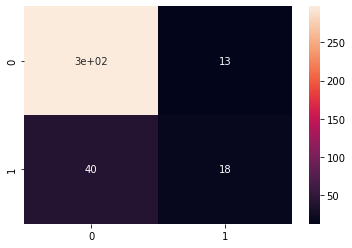

In [606]:
sns.heatmap(cm, annot=True)


In [607]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       310
           1       0.58      0.31      0.40        58

    accuracy                           0.86       368
   macro avg       0.73      0.63      0.66       368
weighted avg       0.83      0.86      0.84       368



### b) Aplicação do modelo Random Forest

In [608]:
forest = RandomForestClassifier(criterion = 'entropy', min_samples_split=5, n_estimators = 10, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=10, random_state=1)

In [609]:
y_pred = forest.predict(X_test)

In [610]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [611]:
accuracy_score(y_test, y_pred)

0.8641304347826086

In [612]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[305,  45],
       [  5,  13]], dtype=int64)

<AxesSubplot:>

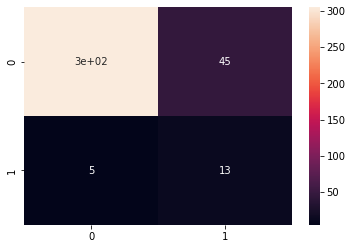

In [613]:
sns.heatmap(cm, annot=True)

In [614]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       310
           1       0.72      0.22      0.34        58

    accuracy                           0.86       368
   macro avg       0.80      0.60      0.63       368
weighted avg       0.85      0.86      0.83       368



### c) Aplicação do modelo de Redes Neurais

In [615]:
X_train.shape

(1102, 50)

In [616]:
(50 + 1) / 2

25.5

In [617]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [618]:
rede_neural.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 25)                1275      
                                                                 
 dense_21 (Dense)            (None, 25)                650       
                                                                 
 dense_22 (Dense)            (None, 25)                650       
                                                                 
 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [619]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [620]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 0s 761us/step - loss: 0.4648 - accuracy: 0.8358
Epoch 2/200
35/35 [==============================] - 0s 792us/step - loss: 0.4173 - accuracy: 0.8376
Epoch 3/200
35/35 [==============================] - 0s 792us/step - loss: 0.3955 - accuracy: 0.8376
Epoch 4/200
35/35 [==============================] - 0s 733us/step - loss: 0.3773 - accuracy: 0.8376
Epoch 5/200
35/35 [==============================] - 0s 733us/step - loss: 0.3590 - accuracy: 0.8430
Epoch 6/200
35/35 [==============================] - 0s 733us/step - loss: 0.3400 - accuracy: 0.8512
Epoch 7/200
35/35 [==============================] - 0s 704us/step - loss: 0.3257 - accuracy: 0.8711
Epoch 8/200
35/35 [==============================] - 0s 733us/step - loss: 0.3108 - accuracy: 0.8775
Epoch 9/200
35/35 [==============================] - 0s 704us/step - loss: 0.3034 - accuracy: 0.8820
Epoch 10/200
35/35 [==============================] - 0s 763us/step - loss: 0.2854 - accura

In [621]:
y_pred = rede_neural.predict(X_test)
y_pred

array([[1.18848698e-09],
       [8.37607241e-12],
       [3.32574007e-12],
       [1.00434114e-11],
       [5.51354752e-12],
       [5.10608334e-14],
       [1.64062102e-12],
       [3.09891246e-09],
       [1.30438309e-07],
       [8.37648062e-10],
       [6.65343735e-12],
       [1.00931541e-10],
       [5.73569536e-03],
       [4.04710164e-07],
       [1.02134141e-10],
       [9.69946384e-04],
       [6.64138088e-06],
       [7.17357762e-17],
       [1.44368968e-07],
       [7.46786594e-04],
       [9.52869713e-01],
       [9.99183893e-01],
       [2.55209561e-05],
       [4.16061019e-10],
       [5.53969232e-11],
       [6.13457814e-07],
       [1.74650550e-03],
       [9.37920505e-11],
       [1.36148412e-10],
       [1.11666630e-15],
       [9.03526307e-05],
       [3.12226113e-11],
       [9.98188972e-01],
       [1.79890480e-06],
       [8.04080595e-16],
       [4.15979855e-11],
       [1.34376245e-18],
       [4.35852743e-10],
       [1.15575929e-07],
       [1.74031314e-07],


In [628]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

In [629]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[288,  22],
       [ 36,  22]], dtype=int64)

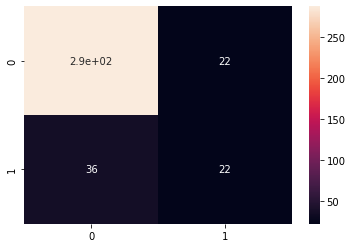

In [630]:
sns.heatmap(cm, annot=True);

In [631]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       310
           1       0.50      0.38      0.43        58

    accuracy                           0.84       368
   macro avg       0.69      0.65      0.67       368
weighted avg       0.83      0.84      0.83       368



In [632]:
#validação cruzada

#### Para ter mais fidedignidade do resultado, realizamos um loop for para comparar os resultados médios entre cada um dos modelos.

In [633]:
resultados_logistica = []
resultados_rede_neural = []
resultados_random_forest = []


In [634]:
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X_train,y_train, cv = kfold)
    resultados_logistica.append(scores.mean())
    
    random_forest = RandomForestClassifier(n_estimators=10)
    scores = cross_val_score(random_forest, X_train, y_train, cv = kfold)
    resultados_random_forest.append(scores.mean())
    
    rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
    resultados_rede_neural.append(scores.mean())

    



In [638]:
resultadosrf = pd.DataFrame({'Random forest': resultados_random_forest})
resultados_log = pd.DataFrame({'Regressão Logistica': resultados_logistica})
resultados_RN = pd.DataFrame({'Redes neurais': resultados_rede_neural})




In [639]:
print(resultadosrf.describe(),
      '\n','\n',
      resultados_log.describe(),
      '\n','\n',
      resultados_RN.describe())

       Random forest
count      30.000000
mean        0.846453
std         0.005522
min         0.838460
25%         0.842332
50%         0.845692
75%         0.849384
max         0.861179 
 
        Regressão Logistica
count            30.000000
mean              0.880421
std               0.002858
min               0.873841
25%               0.878661
50%               0.880643
75%               0.882072
max               0.885667 
 
        Redes neurais
count      30.000000
mean        0.846453
std         0.005522
min         0.838460
25%         0.842332
50%         0.845692
75%         0.849384
max         0.861179


## Resposta: 
##### Através das validações cruzadas é possível ter um resumo da variabilidade dos resultados dos algoritmos de Random Forest, Regressão Logística e Redes Neurais. Ao observar os resultados acima, foi possível identificar que a Regressão Logística foi a que mais explica e mais consegue acertar a identificação dos funcionários quem saem da empresa. Contudo, é possível afirmar também que de forma geral todos os algoritmos conseguem acertar mais quem fica do quem sai da empresa. Isso significa que o departamento de RH assim como o de Data Science precisam de ter mais atenção na elaboração de instrumentos adequados capazes de medir a saída das pessoas da empresa.

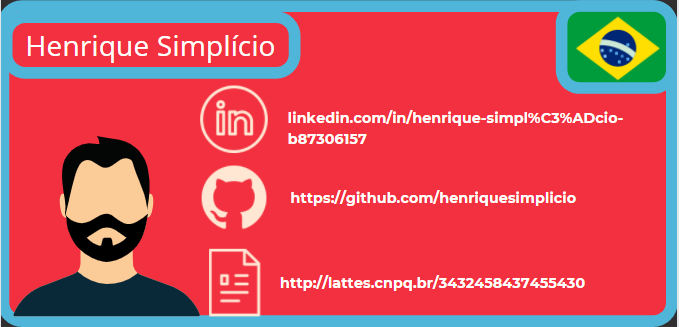